In [1]:
import torch
import torchvision
from torch import nn
from torchvision.models.detection import KeypointRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision import transforms

import sys, os
sys.path.append(os.path.join('..'))
import lib
from dataset import custom_transforms

sys.path.append(os.path.join('..','lib','dataset'))

import lib
from dataset import PoseDataset

from matplotlib import pyplot as plt
import numpy as np

In [2]:
backbone = torchvision.models.resnet152(pretrained=True)
print(backbone)
backbone.out_channels = 1280

m2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (7): Bottleneck(
      (conv1): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affi

In [3]:
!pwd

/mnt/c/Users/Vande/OneDrive - ugentbe/Ingenieurswetenschappen/_master/thesis/SwimPose/lib/models


In [4]:
anchor_generator = AnchorGenerator(sizes=((256, 512,768,1028),),aspect_ratios=((0.05, 0.1, 0.15,0.2),))
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],output_size=7,sampling_ratio=2)
keypoint_roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],output_size=14,sampling_ratio=2)

In [5]:
 model = KeypointRCNN(backbone,num_classes=2,rpn_anchor_generator=anchor_generator, box_roi_pool=roi_pooler, keypoint_roi_pool=keypoint_roi_pooler)
model.eval()

 affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (11): Bottleneck(
        (conv1): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=Tru

In [2]:
transform=transforms.Compose([custom_transforms.DictToTensor()])
dataset = PoseDataset.PoseDataset(['../../data/vzf/freestyle/freestyle_1'], 3, transform=None)

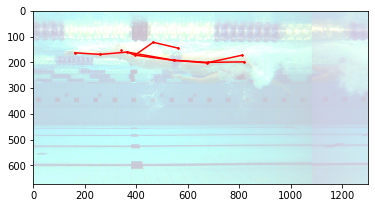

In [6]:
img = dataset[0]['image']
dataset.draw_keypoints(19)

In [ ]:

img_0 = dataset[0]['image']
print(img_0.shape)
prediction = model([img_0])
print(prediction)

In [ ]:
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']
keypoints = prediction[0]['keypoints']

In [94]:
print(boxes.shape)
print(labels.shape)
print(scores.shape)
print(keypoints.shape)

torch.Size([47, 4])
torch.Size([47])
torch.Size([47])
torch.Size([47, 17, 3])


In [95]:
print(labels)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [96]:
print(boxes[0])
print(scores[0])
print(labels[0])
print(keypoints[0])

tensor([1174.3131,  187.5393, 1299.1917,  323.9650], grad_fn=<SelectBackward>)
tensor(0.5320, grad_fn=<SelectBackward>)
tensor(1)
tensor([[1.2116e+03, 3.1178e+02, 1.0000e+00],
        [1.2348e+03, 2.9717e+02, 1.0000e+00],
        [1.2213e+03, 2.9717e+02, 1.0000e+00],
        [1.1903e+03, 2.8742e+02, 1.0000e+00],
        [1.1942e+03, 2.7281e+02, 1.0000e+00],
        [1.2300e+03, 3.0691e+02, 1.0000e+00],
        [1.2077e+03, 2.2895e+02, 1.0000e+00],
        [1.2348e+03, 2.5819e+02, 1.0000e+00],
        [1.1806e+03, 3.1178e+02, 1.0000e+00],
        [1.2126e+03, 3.1178e+02, 1.0000e+00],
        [1.1942e+03, 2.9717e+02, 1.0000e+00],
        [1.1990e+03, 2.9717e+02, 1.0000e+00],
        [1.2387e+03, 2.2895e+02, 1.0000e+00],
        [1.2038e+03, 2.3383e+02, 1.0000e+00],
        [1.2164e+03, 2.7281e+02, 1.0000e+00],
        [1.2077e+03, 3.0204e+02, 1.0000e+00],
        [1.2164e+03, 2.8255e+02, 1.0000e+00]], grad_fn=<SelectBackward>)


In [97]:
print(dataset[0]['target'])

{'boxes': tensor([249., 157., 952., 285.]), 'labels': tensor([1, 1, 1, 1], dtype=torch.int32), 'keypoints': tensor([[430., 199.,   1.],
        [471., 178.,   1.],
        [393., 202.,   1.],
        [299., 226.,   1.],
        [649., 224.,   1.],
        [774., 227.,   1.],
        [893., 175.,   1.],
        [482., 221.,   1.],
        [389., 223.,   1.],
        [299., 226.,   1.],
        [657., 266.,   1.],
        [782., 253.,   1.],
        [893., 200.,   1.]])}


0.5320091843605042


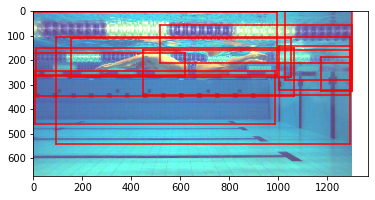

In [112]:

plt.figure()
# show image
plt.imshow(img_0.permute(1,2,0).detach().numpy())
max_score = 0
max_box = []
for idx, box in enumerate(boxes):
    if scores[idx].item() > max_score:
        max_score = scores[idx].item()
        max_box = box
print(max_score)
for box in boxes[np.where(scores > .51)]:

    # add keypoints to imag
        # TODO: add color coding for different body parts
        
        # draw lines as specified in skeleton 
    
    plt.plot([box[0], box[2]], [box[1], box[1]], c='r')
    plt.plot([box[0], box[2]], [box[3], box[3]], c='r')
    plt.plot([box[0], box[0]], [box[1], box[3]], c='r')
    plt.plot([box[2], box[2]], [box[1], box[3]], c='r')


        # pause a bit so that plots are updated
plt.pause(0.001)  
        
        # display
plt.show(block=True)